In [154]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

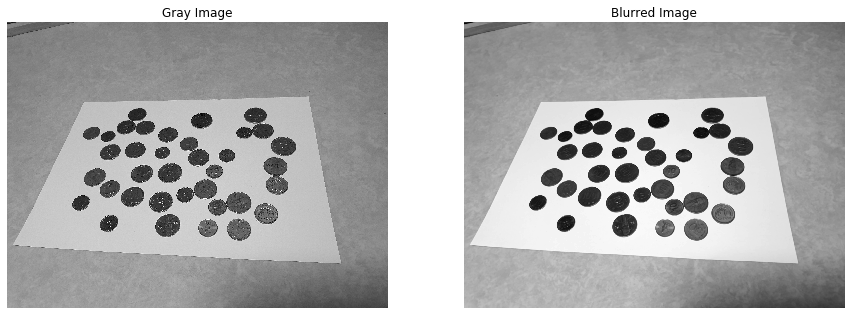

In [177]:
#image 흑백처리, 이진화 (그냥 Threshold)

img = cv2.imread('4.jpg')
img_ori = img.copy()
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Blurring

dst = cv2.bilateralFilter(img_gray, 10, 100, 100) # Bilateral Filtering
dst1 = cv2.GaussianBlur(dst, (5,5), 0)       # GaussianBlur
dst2 = cv2.medianBlur(dst1, 9)                # Median Blur


plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img_gray, cmap='gray'), plt.title('Gray Image'), plt.axis('off')
plt.subplot(122), plt.imshow(dst2, cmap='gray'), plt.title('Blurred Image'), plt.axis('off')
plt.show()

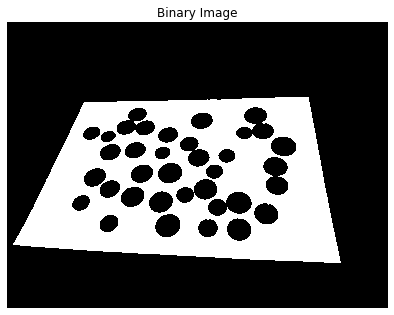

In [182]:
# Thresholding

ret_threshold, binary_img = cv2.threshold(dst2,
                                          170,
                                          255,
                                          cv2.THRESH_BINARY_INV)
binary_img = cv2.bitwise_not(binary_img)


plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(binary_img, cmap='gray'), plt.title('Binary Image'), plt.axis('off')
plt.show()

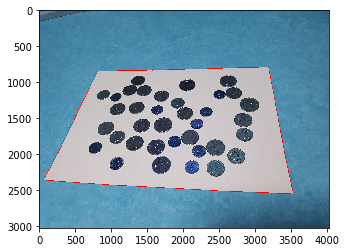

In [183]:
#contour을 찾고 A4용지의 외곽선 그리기
img, contour, hierarchy = cv2.findContours(binary_img, 
                                            cv2.RETR_EXTERNAL, 
                                            cv2.CHAIN_APPROX_SIMPLE)

img = img_ori.copy()

# Draw Contour with Blue
cv2.drawContours(img, contour, -1, (255,0,0), 5)
plt.figure()
plt.imshow(img)

In [184]:
#print(len(contour[0]))
#print(len(contour[1]))
max = 0;
index = -1;
for i in range(len(contour)):
   # print(max,i)
    if(max<len(contour[i])):        
        index = i
        max = len(contour[i])
        print(max, i)

4 0
2631 1


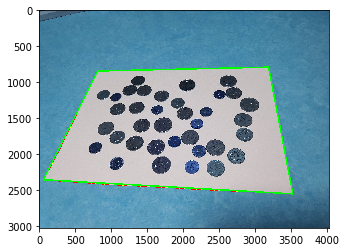

In [185]:
cnt=contour[index]

cv2.drawContours(img, [cnt], 0, (255, 255, 0), 1)

epsilon1 = 0.1*cv2.arcLength(cnt, True)

approx1 = cv2.approxPolyDP(cnt, epsilon1, True)

cv2.drawContours(img, [approx1], 0, (0, 255, 0), 20)

plt.imshow(img)

In [186]:
print(approx1)

[[[3191  792]]

 [[ 817  846]]

 [[  61 2354]]

 [[3530 2550]]]


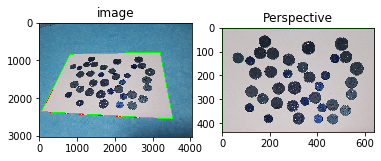

True

In [187]:
#prospective Transform
    
pts0 = np.float32([approx1[1], approx1[2], approx1[0], approx1[3]])

# 좌표의 이동점
pts2 = np.float32([[0,0],[0,437],[640,0],[640,437]])

M = cv2.getPerspectiveTransform(pts0, pts2)

dst = cv2.warpPerspective(img, M, (640,437))


plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


# 이미지 저장하기
cv2.imwrite('done.jpg', dst)


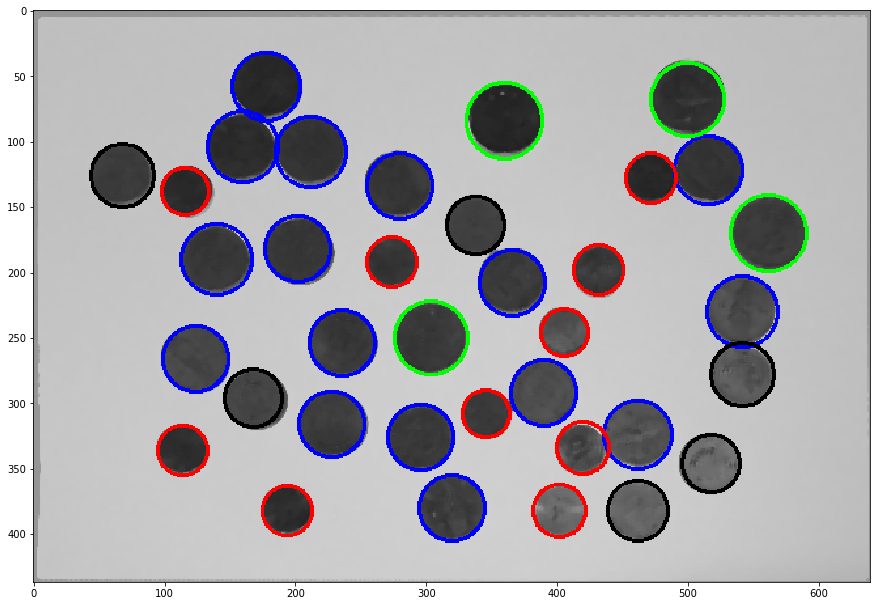

In [188]:
# 방법 1) 한번에 찾는 방법

overlap = cv2.imread('done.jpg', 0)              # 위에서까지 실행한 이미지를 'done.jpg'라고 저장하고, overlap에 불러옴
overlap = cv2.medianBlur(overlap, 5)             # Blur 처리해서 noise를 제거한다
cimg = cv2.cvtColor(overlap, cv2.COLOR_GRAY2BGR)

# 겹친 동전의 모양까지 원으로 검출하는 기준을 정의한다
circles = cv2.HoughCircles(overlap, cv2.HOUGH_GRADIENT, 1, 20, np.array([]), param1=150, param2=20, minRadius=15, maxRadius=50)
circles = np.uint16(np.around(circles))

fivehund = 0
onehund = 0
fifty = 0
ten = 0

# 위 조건에 맞춰 cimg에 원을 그린다
for circ in circles[0,:]:
    if circ[2] >= 50 or circ[2] >= 38 or circ[2] >= 28:
        fivehund += 1
        cv2.circle(cimg, (circ[0], circ[1]), circ[2], (0,255,0) ,2)
    elif circ[2] >= 40 or circ[2] >= 35 or circ[2] >= 25:
        onehund += 1
        cv2.circle(cimg, (circ[0], circ[1]), circ[2], (0,0,255) ,2)
    elif circ[2] >= 30 or circ[2] >= 22:
        fifty += 1
        cv2.circle(cimg, (circ[0], circ[1]), circ[2], (0,0,0) ,2)
    else:
        ten += 1
        cv2.circle(cimg, (circ[0], circ[1]), circ[2], (255,0,0), 2)


# 원형의 컨투어가 따인 cimg 출력
cv2.imshow('img', cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(15,15))
plt.imshow(cimg)
plt.show()

In [189]:
# 방법 2) 함수로 정의해서 원을 하나씩 순차적으로 찾는 방법 (한번에 찾게 수정해도 됨)
# 원을 찾지 못할 경우까지 고려
# 순서가 헷갈리니까 찾을 때 순서를 나타내는 숫자를 넣어야 할까

def findCircle():
    overlap = cv2.imread('done.jpg', 0)
    overlap = cv2.medianBlur(overlap, 5)
    cimg = cv2.cvtColor(overlap, cv2.COLOR_GRAY2BGR)
    
    circles = cv2.HoughCircles(overlap, cv2.HOUGH_GRADIENT, 1, 50, np.array([]),
                               param1=50, param2=25, minRadius=24, maxRadius=50)
    circles = np.uint16(np.around(circles))
    
    if circles is not None:
        circles = np.uint16(np.around(circles))
        
        for circ in circles[0,:]:
            cv2.circle(cimg, (circ[0], circ[1]), circ[2], (0,255,0), 2)
            cv2.circle(cimg, (circ[0], circ[1]), 2, (255,0,0), 3)
            
            cv2.imshow('Circles detected', cimg)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            
            plt.figure(figsize=(5,5))
            plt.imshow(cimg), plt.axis('off')            
    else:
        print('원을 찾을 수 없음')
    
    plt.show()

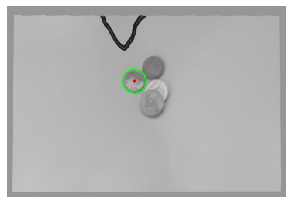

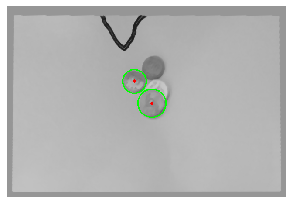

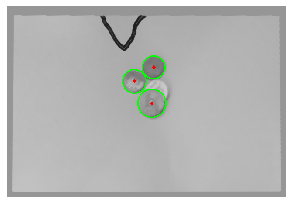

In [147]:
findCircle()

In [190]:
# 동전 좌표 확인하기

count = circles[0,:]        # 인식된 원의 개수를 count라고 지정한다
# len(count)                  # 인식된 원의 개수를 세어서 반환한다
c_array = circles.reshape(len(count), -1)                      # 검출된 원의 개수를 행의 개수로 하는 배열을 array라고 지정한다
radiusSet = c_array[:,-1]

print('\n동전의 (x좌표, y좌표, 반지름) 배열: \n', c_array)     # 여기서 x,y좌표는 원의 중심의 좌표를 의미함
print('\n동전의 반지름 리스트: \n', radiusSet)


동전의 (x좌표, y좌표, 반지름) 배열: 
 [[562 170  29]
 [462 324  26]
 [304 250  28]
 [338 164  22]
 [228 316  25]
 [360  84  29]
 [320 380  25]
 [516 122  26]
 [212 108  27]
 [280 134  25]
 [366 208  25]
 [236 254  25]
 [124 266  25]
 [140 190  27]
 [160 104  27]
 [274 192  19]
 [472 128  19]
 [202 182  25]
 [518 346  22]
 [296 326  25]
 [462 382  23]
 [116 138  18]
 [542 230  27]
 [500  68  28]
 [542 278  24]
 [346 308  18]
 [178  58  26]
 [194 382  19]
 [114 336  19]
 [ 68 126  24]
 [432 198  19]
 [402 382  20]
 [390 292  25]
 [406 246  18]
 [168 296  22]
 [420 334  20]]

동전의 반지름 리스트: 
 [29 26 28 22 25 29 25 26 27 25 25 25 25 27 27 19 19 25 22 25 23 18 27 28
 24 18 26 19 19 24 19 20 25 18 22 20]


In [192]:
# 총액 계산하기

total = (500 * fivehund + 100 * onehund + 50 * fifty + 10 * ten)

print('500원: {} 개'.format(fivehund),
      '\n100원: {} 개'.format(onehund),
      '\n 50원: {} 개'.format(fifty),
      '\n 10원: {} 개'.format(ten))
print('동전 총합: {} 원'.format(total))

500원: 4 개 
100원: 16 개 
 50원: 6 개 
 10원: 10 개
동전 총합: 4000 원


In [193]:
import requests
import json

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

def jpy2krw():
    url = 'https://quotation-api-cdn.dunamu.com/v1/forex/recent?codes=FRX.KRWJPY'
    exchange =requests.get(url, headers=headers).json()
    return exchange[0]['basePrice']

def usd2krw():
    url = 'https://quotation-api-cdn.dunamu.com/v1/forex/recent?codes=FRX.KRWUSD'
    exchange =requests.get(url, headers=headers).json()
    return exchange[0]['basePrice']


# 외화 1 단위 --> 원화
usd = usd2krw()
jpy = jpy2krw()

print('환율 : 1 달러 당', usd)
print('환율 : 1 엔 당', jpy / 100)


# 원화 --> 외화
usd_tot = total / usd
jpy_tot = total / (jpy/100)

print('\n총액은 달러로', usd_tot)
print('총액은 엔으로', jpy_tot)

환율 : 1 달러 당 1168.5
환율 : 1 엔 당 10.789000000000001

총액은 달러로 3.4231921266581087
총액은 엔으로 370.7479840578366
